In [1]:
%%time
import nltk

Wall time: 929 ms


In [2]:
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\tjoeun709\AppData\Roaming\nltk_data

True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [5]:
from nltk.tokenize import sent_tokenize 
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize 
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [7]:
from nltk.tokenize import RegexpTokenizer 
retokenize = RegexpTokenizer("[\w]+") 
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'files', 'flying', 'flew', 'flown']

print('porter stemmer : ', [st1.stem(w) for w in words])
print('lancaster stemmer : ', [st2.stem(w) for w in words])


porter stemmer :  ['fli', 'file', 'fli', 'flew', 'flown']
lancaster stemmer :  ['fly', 'fil', 'fly', 'flew', 'flown']


In [9]:
from nltk.stem import WordNetLemmatizer 
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = "v") for w in words]

['fly', 'file', 'fly', 'fly', 'fly']

In [10]:
 nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit" 
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [12]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"] 
nouns_list

['refuse', 'permit']

In [13]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [14]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [15]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw))

In [16]:
text.plot(20)

<Figure size 640x480 with 1 Axes>

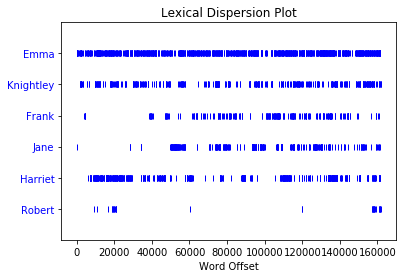

In [64]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [17]:
text.concordance("Emma")

Displaying 25 of 25 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER 
 Emma Woodhouse handsome clever and rich wi
of both daughters but particularly of Emma Between _them_ it was more the intima
and friend very mutually attached and Emma doing just what she liked highly este
y by her own The real evils indeed of Emma s situation were the power of having 
dding day of this beloved friend that Emma first sat in mournful thought of any 
 going only half a mile from them but Emma was aware that great must be the diff
 a day It was a melancholy change and Emma could not but sigh over it and wish f
all the rest of her life at Hartfield Emma smiled and chatted as cheerfully as s
ll be able to tell her how we all are Emma spared no exertions to maintain this 
lor I have a great regard for you and Emma but when it comes to the question of 
 a fanciful troublesome creature said Emma playfully That is what you have in yo
he few people who could see faults in Emma Woodhouse and the only one who

In [18]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [19]:
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [20]:
fd = text.vocab() 
type(fd)

nltk.probability.FreqDist

In [21]:
from nltk import FreqDist
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [22]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [23]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

In [27]:
import numpy as np  # 다차원 배열을 쉽고 효율적으로 처리
import matplotlib.pyplot as plt  # 시각화 가장 기본적인 기능
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# f_path = "/Users/administrator/Library/Fonts/AppleGothic.ttf"  => 맥용
f_path = "C:/Windows/Fonts/malgun.ttf"  # 윈도우용
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [25]:
!pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


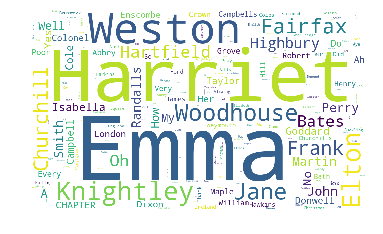

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width =1000, height =600, background_color= "white", random_state= 0) 
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

In [29]:
!pip install JPype1

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
!pip install konlpy

  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [32]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [33]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [35]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


SystemError: java.nio.file.InvalidPathException: Illegal char <*> at index 55: C:\ProgramData\Anaconda3\lib\site-packages\konlpy\java\*